# Startups Sataset Multi-Linear Regression

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse,r2_score as r2,mean_absolute_error as mae
from sklearn.preprocessing import StandardScaler, minmax_scale
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import statsmodels.formula.api as sm

In [2]:
def AdjR(r2, p, n):
    R2_Adj = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    return R2_Adj

In [3]:
dataset = pd.read_csv('dataset.csv')

In [4]:
dataset.head()

R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          49 non-null float64
Administration     49 non-null float64
Marketing Spend    49 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


In [6]:
dataset.describe()

R&D Spend  Administration  Marketing Spend         Profit
count      49.000000       49.000000        49.000000      50.000000
mean    74093.608776   121315.290408    215331.732449  112012.639200
std     46301.730529    28307.373863    119665.391550   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     38558.510000   103057.490000    134050.070000   90138.902500
50%     73994.560000   122616.840000    214634.810000  107978.190000
75%    101913.080000   145077.580000    299737.290000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000

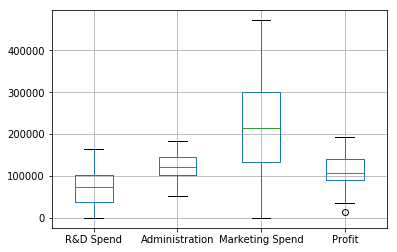

In [7]:
dataset.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BC4E748>,
      dtype=object)

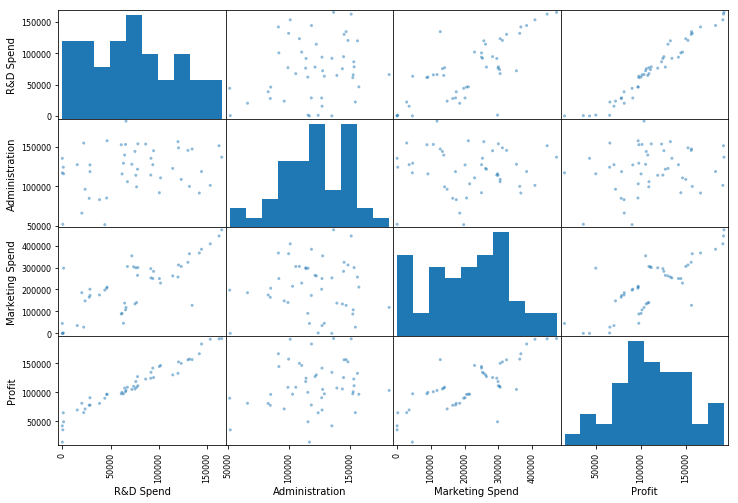

In [8]:
pd.plotting.scatter_matrix(dataset,figsize=(12,8))

## Replacing Null-Values with the median

In [9]:
median = dataset.median()
dataset = dataset.fillna(median)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


## Splitting Dataset into X & Y

In [11]:
X = dataset.iloc[:, :-1]
Y = dataset.iloc[:, -1]

## Encoding Categorical Data

In [12]:
# Firstly, we encode the Column
LE = LabelEncoder()
X.State = LE.fit_transform(X.State)
X.head()

R&D Spend  Administration  Marketing Spend  State
0  165349.20       136897.80        471784.10      2
1  162597.70       151377.59        443898.53      0
2  153441.51       101145.55        407934.54      1
3  144372.41       118671.85        383199.62      2
4  142107.34        91391.77        366168.42      1

In [13]:
LE.classes_

array(['California', 'Florida', 'New York'], dtype=object)

In [14]:
LE.inverse_transform([0]), LE.inverse_transform([1]), LE.inverse_transform([2])

(array(['California'], dtype=object),
 array(['Florida'], dtype=object),
 array(['New York'], dtype=object))

In [15]:
OHE = OneHotEncoder(categorical_features = [3])
X = OHE.fit_transform(X).toarray()
X

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.6534920e+05,
        1.3689780e+05, 4.7178410e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6259770e+05,
        1.5137759e+05, 4.4389853e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5344151e+05,
        1.0114555e+05, 4.0793454e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.4437241e+05,
        1.1867185e+05, 3.8319962e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.4210734e+05,
        9.1391770e+04, 3.6616842e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.3187690e+05,
        9.9814710e+04, 3.6286136e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.3461546e+05,
        1.4719887e+05, 1.2771682e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.3029813e+05,
        1.4553006e+05, 3.2387668e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.2054252e+05,
        1.4871895e+05, 3.1161329e+05],
       [1.0000000e+00, 0.0000000e+00,

In [16]:
X = X.astype(int)
Y = Y.astype(int)

In [17]:
X = X[:, 1:]
X

array([[     0,      1, 165349, 136897, 471784],
       [     0,      0, 162597, 151377, 443898],
       [     1,      0, 153441, 101145, 407934],
       [     0,      1, 144372, 118671, 383199],
       [     1,      0, 142107,  91391, 366168],
       [     0,      1, 131876,  99814, 362861],
       [     0,      0, 134615, 147198, 127716],
       [     1,      0, 130298, 145530, 323876],
       [     0,      1, 120542, 148718, 311613],
       [     0,      0, 123334, 108679, 304981],
       [     1,      0, 101913, 110594, 229160],
       [     0,      0, 100671,  91790, 249744],
       [     1,      0,  93863, 127320, 249839],
       [     0,      0,  91992, 135495, 252664],
       [     1,      0, 119943, 156547, 256512],
       [     0,      1, 114523, 122616, 261776],
       [     0,      0,  78013, 121597, 264346],
       [     0,      1,  94657, 145077, 282574],
       [     1,      0,  91749, 114175, 294919],
       [     0,      1,  86419, 153514, 214634],
       [     0,     

# Linear Model With NO Edition

In [18]:
X1, Y1 = X.copy(), Y.copy()

{'whiskers': [<matplotlib.lines.Line2D at 0xc1ffd68>,
 'caps': [<matplotlib.lines.Line2D at 0xc2036d8>,
 'boxes': [<matplotlib.lines.Line2D at 0xc1ffc18>,
 'medians': [<matplotlib.lines.Line2D at 0xc203d68>,
 'fliers': [<matplotlib.lines.Line2D at 0xc203e48>,
 'means': []}

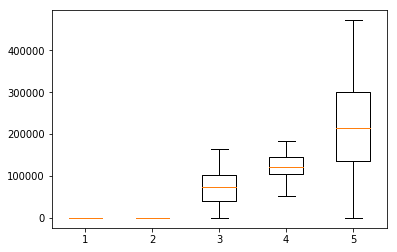

In [19]:
plt.boxplot(X1)
#boxplot before normalizing

In [20]:
regressor1 = LinearRegression()
regressor1.fit(X1,Y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
Y_hat1 = regressor1.predict(X1)

In [22]:
intercept1, coef1 = regressor1.intercept_, regressor1.coef_

In [23]:
print('Intercept: ', intercept1, '\n', 'Coef: ', coef1 )

Intercept:  48716.72024640226 
 Coef:  [-9.74760732e+02 -4.82830489e+02  7.90147864e-01 -1.86475844e-02
  3.47915489e-02]


In [24]:
mae1, mse1, rmse1, R21  = mae(Y1, Y_hat1), mse(Y1, Y_hat1),math.sqrt(mse(Y1, Y_hat1)), r2(Y1, Y_hat1)
mae1, mse1,rmse1, R21 

(6589.347070004357, 81985091.69343527, 9054.561927196437, 0.9485048888883865)

In [25]:
r21adj = AdjR(R21, X1.shape[1], X1.shape[0])
r21adj

0.9426531717166122

In [26]:
print('MSE: ', mse1,'\n','RMSE:', rmse1,'\n' 'MAE: ', mae1,'\n' 'R^2:' ,R21)

MSE:  81985091.69343527 
 RMSE: 9054.561927196437 
MAE:  6589.347070004357 
R^2: 0.9485048888883865


## Linear-Model with Range Scaling

In [59]:
X2, Y2 = X.copy(), Y.copy()

{'whiskers': [<matplotlib.lines.Line2D at 0xca44ef0>,
 'caps': [<matplotlib.lines.Line2D at 0xca545c0>,
 'boxes': [<matplotlib.lines.Line2D at 0xca50b00>,
 'medians': [<matplotlib.lines.Line2D at 0xca54c50>,
 'fliers': [<matplotlib.lines.Line2D at 0xca54f98>,
 'means': []}

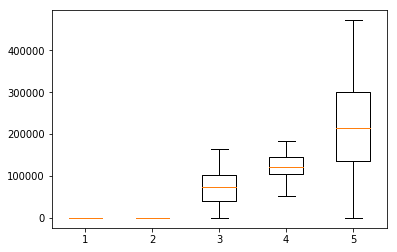

In [60]:
plt.boxplot(X)
#boxplot before normalizing

In [61]:
X2 = minmax_scale(X2)
Y2 = minmax_scale(Y2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


{'whiskers': [<matplotlib.lines.Line2D at 0xcae6e80>,
 'caps': [<matplotlib.lines.Line2D at 0xcaf6550>,
 'boxes': [<matplotlib.lines.Line2D at 0xcaf0a90>,
 'medians': [<matplotlib.lines.Line2D at 0xcaf6be0>,
 'fliers': [<matplotlib.lines.Line2D at 0xcaf6f28>,
 'means': []}

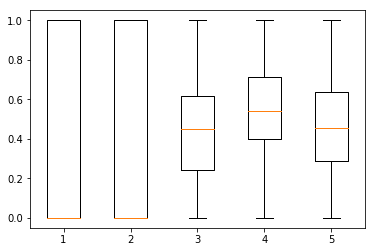

In [62]:
plt.boxplot(X2)
#boxplot after normalizing

In [63]:
regressor2 = LinearRegression()
regressor2.fit(X2, Y2)
Y_hat2 = regressor2.predict(X2)

In [64]:
Y_hat2 = regressor2.predict(X2)

In [65]:
intercept2, coef2 = regressor2.intercept_, regressor2.coef_

In [66]:
print('Intercept: ', intercept2, '\n', 'Coef: ', coef2 )

Intercept:  0.18627895132035904 
 Coef:  [-0.00548914 -0.00271895  0.73572564 -0.01379426  0.09243212]


In [67]:
mae2, mse2, rmse2, R22  = mae(Y2, Y_hat2), mse(Y2, Y_hat2),math.sqrt(mse(Y2, Y_hat2)), r2(Y2, Y_hat2)
mae2, mse2,rmse2, R22 

(0.03710635809214807,
 0.0025998409703121197,
 0.05098863569769366,
 0.9485048888883865)

In [68]:
r22adj = AdjR(R22, X2.shape[1], X2.shape[0])
r22adj

0.9426531717166122

In [69]:
print('MSE: ', mse2,'\n','RMSE:', rmse2,'\n' 'MAE: ', mae2,'\n' 'R^2:' ,R22)

MSE:  0.0025998409703121197 
 RMSE: 0.05098863569769366 
MAE:  0.03710635809214807 
R^2: 0.9485048888883865


## Linear-Model With Data Normalization on Z-Distribution

In [70]:
X3, Y3 = X.copy(), Y.values.reshape((-1, 1)).copy()

{'whiskers': [<matplotlib.lines.Line2D at 0xdb5e780>,
 'caps': [<matplotlib.lines.Line2D at 0xdb66e10>,
 'boxes': [<matplotlib.lines.Line2D at 0xdb66390>,
 'medians': [<matplotlib.lines.Line2D at 0xdb6e4e0>,
 'fliers': [<matplotlib.lines.Line2D at 0xdb6e828>,
 'means': []}

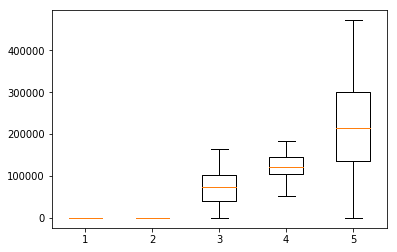

In [71]:
plt.boxplot(X)
#boxplot before normalizing

### It doesn't make sense to apply the Z-Technique on the categorical encoded data
#### so, let's apply ito only on the continuous X & Y Data then concat all the X Columns again

In [72]:
X_cat = X3[:,0:2]
X_cat = pd.DataFrame(X_cat)

In [73]:
X_ss = StandardScaler()
Y_ss = StandardScaler()
X3 = X_ss.fit_transform(X3[:,2:5])
Y3 = Y_ss.fit_transform(Y3)
X3 = pd.DataFrame(X3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [74]:
X3 = pd.concat([X3, X_cat], axis = 1 )

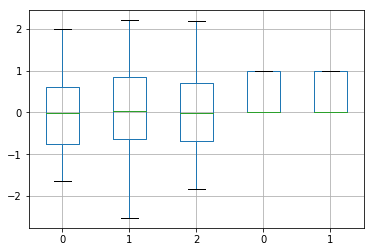

In [75]:
X3.boxplot()
#boxplot before normalizing

In [76]:
regressor3 = LinearRegression()
regressor3.fit(X3, Y3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [77]:
Y_hat3 = regressor3.predict(X3)

In [78]:
intercept3, coef3 = regressor3.intercept_, regressor3.coef_

In [79]:
print('Intercept: ', intercept3, '\n', 'Coef: ', coef3 )

Intercept:  [0.01193166] 
 Coef:  [[ 0.89837287 -0.0129623   0.10223356 -0.02442944 -0.01210069]]


In [80]:
mae3, mse3, rmse3, R23  = mae(Y3, Y_hat3), mse(Y3, Y_hat3),math.sqrt(mse(Y3, Y_hat3)), r2(Y3, Y_hat3)
mae3, mse3,rmse3, R23 

(0.16514215191826231,
 0.05149511111161347,
 0.22692534259446095,
 0.9485048888883865)

In [81]:
r23adj = AdjR(R23, X3.shape[1], X3.shape[0])
r23adj

0.9426531717166122

In [82]:
print('MSE: ', mse3,'\n','RMSE:', rmse3,'\n' 'MAE: ', mae3,'\n' 'R^2:' ,R23)

MSE:  0.05149511111161347 
 RMSE: 0.22692534259446095 
MAE:  0.16514215191826231 
R^2: 0.9485048888883865


## Linear-Model With Data Normalization on Z-Distribution and Removing Outliers 
#### IF there are any outlieres 

In [83]:
X4, Y4= X3.copy(), Y3.copy()
X4 = pd.DataFrame(X4)
Y4 = pd.DataFrame(Y4)

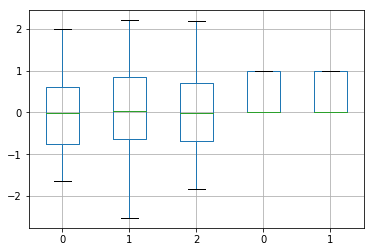

In [84]:
X4.boxplot()

In [85]:
Xnorm, Ynorm = X3.copy(),Y3.copy()
Xnorm = pd.DataFrame(Xnorm)
Ynorm = pd.DataFrame(Ynorm)
dataset_z = pd.concat([Xnorm, Ynorm], axis= 1)
dataset_z.head()

0         1         2  0  1         0
0  2.011581  0.560865  2.187393  0  1  2.011197
1  1.950919  1.082930  1.949554  0  0  1.999443
2  1.749095 -0.728145  1.642819  1  0  1.980847
3  1.549189 -0.096259  1.431855  0  1  1.776617
4  1.499262 -1.079818  1.286599  1  0  1.357731

In [86]:
dataset_z.columns = ['R&D Spend', 'Administration', 'Marketing Spend', '0', '1', 'Profit' ]

In [87]:
dataset_z.head()

R&D Spend  Administration  Marketing Spend  0  1    Profit
0   2.011581        0.560865         2.187393  0  1  2.011197
1   1.950919        1.082930         1.949554  0  0  1.999443
2   1.749095       -0.728145         1.642819  1  0  1.980847
3   1.549189       -0.096259         1.431855  0  1  1.776617
4   1.499262       -1.079818         1.286599  1  0  1.357731

In [88]:
dataset_z[dataset_z > 3] = 3
dataset_z[dataset_z < -3] = -3
X4 = dataset_z.iloc[:, :-1]
Y4 = dataset_z.iloc[:, -1].values.reshape((-1, 1))

In [89]:
regressor4 = LinearRegression()
regressor4.fit(X4, Y4)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [90]:
Y_hat4 = regressor4.predict(X4)

In [91]:
intercept4, coef4 = regressor4.intercept_, regressor4.coef_

In [92]:
print('Intercept: ', intercept4, '\n', 'Coef: ', coef4 )

Intercept:  [0.01193166] 
 Coef:  [[ 0.89837287 -0.0129623   0.10223356 -0.02442944 -0.01210069]]


In [93]:
mae4, mse4, rmse4, R24  = mae(Y4, Y_hat4), mse(Y4, Y_hat4),math.sqrt(mse(Y4, Y_hat4)), r2(Y4, Y_hat4)
mae4, mse4,rmse4, R24 

(0.16514215191826231,
 0.05149511111161347,
 0.22692534259446095,
 0.9485048888883865)

In [94]:
r24adj = AdjR(R24, X4.shape[1], X4.shape[0])
r24adj

0.9426531717166122

In [95]:
print('MSE: ', mse4,'\n','RMSE:', rmse4,'\n' 'MAE: ', mae4,'\n' 'R^2:' ,R24)

MSE:  0.05149511111161347 
 RMSE: 0.22692534259446095 
MAE:  0.16514215191826231 
R^2: 0.9485048888883865


## Models Evaluation

In [96]:
Model_eval = pd.DataFrame([['Model1', mae1, mse1, rmse1, R21]
                          , ['Range Scaling',mae2, mse2, rmse2, R22]
                          , ['Z Distributed with outliers', mae3, mse3, rmse3, R23]
                          ,['Z Distributed without outliers', mae4, mse4, rmse4, R24]]
                        ,columns=['Model', 'MAE', 'MSE','RMSE', 'R Squared'])

In [97]:
Model_eval

Model          MAE           MSE         RMSE  \
0                          Model1  6589.347070  8.198509e+07  9054.561927   
1                   Range Scaling     0.037106  2.599841e-03     0.050989   
2     Z Distributed with outliers     0.165142  5.149511e-02     0.226925   
3  Z Distributed without outliers     0.165142  5.149511e-02     0.226925   

   R Squared  
0   0.948505  
1   0.948505  
2   0.948505  
3   0.948505

## Add new random column

In [98]:
df_rand = dataset.copy()

In [99]:
df_rand['Random'] = np.random.randint(1, 6, df_rand.shape[0])

In [100]:
df_rand.head()

R&D Spend  Administration  Marketing Spend       State     Profit  Random
0  165349.20       136897.80        471784.10    New York  192261.83       3
1  162597.70       151377.59        443898.53  California  191792.06       1
2  153441.51       101145.55        407934.54     Florida  191050.39       2
3  144372.41       118671.85        383199.62    New York  182901.99       3
4  142107.34        91391.77        366168.42     Florida  166187.94       2

In [101]:
median = df_rand.median()
df_rand = df_rand.fillna(median)

In [102]:
X_rand = df_rand[['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Random']]
Y_rand = df_rand['Profit']
LE_rand = LabelEncoder()
X_rand.State = LE_rand.fit_transform(X_rand.State)
OHE_rand = OneHotEncoder(categorical_features = [3])
X_rand = OHE_rand.fit_transform(X_rand).toarray()


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\p

In [103]:
X_rand = X_rand.astype(int)
Y_rand = Y_rand.astype(int)
X_rand = X_rand[:, 1:]
X_rand

array([[     0,      1, 165349, 136897, 471784,      3],
       [     0,      0, 162597, 151377, 443898,      1],
       [     1,      0, 153441, 101145, 407934,      2],
       [     0,      1, 144372, 118671, 383199,      3],
       [     1,      0, 142107,  91391, 366168,      2],
       [     0,      1, 131876,  99814, 362861,      5],
       [     0,      0, 134615, 147198, 127716,      5],
       [     1,      0, 130298, 145530, 323876,      3],
       [     0,      1, 120542, 148718, 311613,      5],
       [     0,      0, 123334, 108679, 304981,      3],
       [     1,      0, 101913, 110594, 229160,      3],
       [     0,      0, 100671,  91790, 249744,      5],
       [     1,      0,  93863, 127320, 249839,      4],
       [     0,      0,  91992, 135495, 252664,      2],
       [     1,      0, 119943, 156547, 256512,      2],
       [     0,      1, 114523, 122616, 261776,      1],
       [     0,      0,  78013, 121597, 264346,      3],
       [     0,      1,  94657,

In [104]:
X1_rand, Y1_rand = X_rand.copy(), Y_rand.copy()

In [105]:
regressor1_rand = LinearRegression()
regressor1_rand.fit(X1_rand,Y1_rand)
Y_hat1_rand = regressor1_rand.predict(X1_rand)
intercept1_rand, coef1_rand = regressor1_rand.intercept_, regressor1_rand.coef_
print('Intercept: ', intercept1_rand, '\n', 'Coef: ', coef1_rand )
mae1_rand, mse1_rand, rmse1_rand, R21_rand  = mae(Y1_rand, Y_hat1_rand), mse(Y1_rand, Y_hat1_rand),math.sqrt(mse(Y1_rand, Y_hat1_rand)), r2(Y1_rand, Y_hat1_rand)

print('MSE: ', mse1_rand,'\n','RMSE:', rmse1_rand,'\n' 'MAE: ', mae1_rand,'\n' 'R^2:' ,R21_rand)

Intercept:  41476.25628876583 
 Coef:  [-2.11897203e+03 -1.38122809e+03  7.65955081e-01 -2.33785227e-02
  4.72568896e-02  2.51476486e+03]
MSE:  70806899.32941459 
 RMSE: 8414.683554918425 
MAE:  6379.01542602554 
R^2: 0.955525949009471


In [106]:
r25adj = AdjR(R21_rand, X1_rand.shape[1], X1_rand.shape[0])
r25adj

0.9493202674759088

In [107]:
Model_eval = pd.DataFrame([['Model1', mae1, mse1, rmse1, R21, r25adj]
                          , ['Range Scaling',mae2, mse2, rmse2, R22, r25adj]
                          , ['Z Distributed with outliers', mae3, mse3, rmse3, R23, r25adj]
                          ,['Z Distributed without outliers', mae4, mse4, rmse4, R24, r25adj]
                          ,['Adding Random Column', mae1_rand, mse1_rand, rmse1_rand, R21_rand, r25adj]]
                          ,columns=['Model', 'MAE', 'MSE','RMSE', 'R Squared', 'Adjusted R Squared'])

In [108]:
Model_eval

Model          MAE           MSE         RMSE  \
0                          Model1  6589.347070  8.198509e+07  9054.561927   
1                   Range Scaling     0.037106  2.599841e-03     0.050989   
2     Z Distributed with outliers     0.165142  5.149511e-02     0.226925   
3  Z Distributed without outliers     0.165142  5.149511e-02     0.226925   
4            Adding Random Column  6379.015426  7.080690e+07  8414.683555   

   R Squared  Adjusted R Squared  
0   0.948505             0.94932  
1   0.948505             0.94932  
2   0.948505             0.94932  
3   0.948505             0.94932  
4   0.955526             0.94932

##  Which Feature is SC

## Sence all R^2 Adjuysted are equal I'm chossing the best pipeline using MSE which would be the  **Range Scaling Model**

In [162]:
Xfinal = pd.DataFrame(X)
Yfinal = pd.DataFrame(Y)
Xfinal.columns = ['state1', 'state2', 'R&D Spend', 'Administration', 'Marketing Spend']

In [163]:
Xfinal['rand1'] = np.random.randint(1, 1000, Xfinal.shape[0])
Xfinal['rand2'] = np.random.randint(1, 1000, Xfinal.shape[0])
Xfinal.head()

state1  state2  R&D Spend  Administration  Marketing Spend  rand1  rand2
0       0       1     165349          136897           471784     66    301
1       0       0     162597          151377           443898     10    365
2       1       0     153441          101145           407934      8    226
3       0       1     144372          118671           383199    461    426
4       1       0     142107           91391           366168    804    102

In [164]:
Xfinal = minmax_scale(Xfinal)
Yfinal = minmax_scale(Yfinal)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int32 were all converted to float64.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int32 were all converted to float64.
  


{'whiskers': [<matplotlib.lines.Line2D at 0xf76c4e0>,
 'caps': [<matplotlib.lines.Line2D at 0xf788da0>,
 'boxes': [<matplotlib.lines.Line2D at 0xf788588>,
 'medians': [<matplotlib.lines.Line2D at 0xf7946d8>,
 'fliers': [<matplotlib.lines.Line2D at 0xf794a20>,
 'means': []}

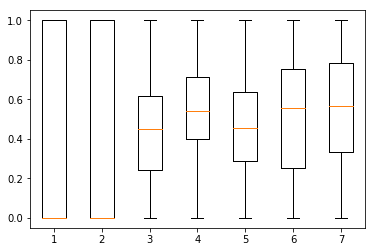

In [165]:
plt.boxplot(Xfinal)

In [166]:
Regressor_Final = LinearRegression()
Regressor_Final.fit(Xfinal, Yfinal)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [167]:
Y_hat_final = Regressor_Final.predict(Xfinal)
intercept_final, coef_final= Regressor_Final.intercept_, Regressor_Final.coef_
print('Intercept: ', intercept_final, '\n', 'Coef: ', coef_final )

mae_final, mse_final, rmse_final, R_final  = mae(Yfinal, Y_hat_final), mse(Yfinal, Y_hat_final),math.sqrt(mse(Yfinal, Y_hat_final)), r2(Yfinal, Y_hat_final)
R_Adjusted_Final = AdjR(R_final, Xfinal.shape[1], Xfinal.shape[0])



Intercept:  [0.16907196] 
 Coef:  [[-0.01693772 -0.00297994  0.74219721 -0.01176449  0.10292109  0.04726901
  -0.02227147]]


In [168]:
print('MSE: ', mse_final,'\n','RMSE:', rmse_final,'\n' 'MAE: ', mae_final,'\n' 'R^2:' ,R_final,'\n', 'Adjusted Squared R', R_Adjusted_Final)

MSE:  0.0023962508893310367 
 RMSE: 0.048951515700037695 
MAE:  0.03554989041603737 
R^2: 0.9525374024001974 
 Adjusted Squared R 0.944626969466897


In [169]:
SL = 0.05

In [170]:
Xfinal = np.append(arr = np.ones((50, 1)).astype(int), values = Xfinal, axis = 1)

In [171]:
Xfinal.shape

(50, 8)

In [119]:
X_opt = Xfinal[:, [0, 1, 2, 3, 4, 5, 6, 7]]

In [136]:
X_opt = Xfinal[:, [0, 1, 2, 3, 4, 5, 6, 7]]
regressor_OLS = sm.OLS(endog = Yfinal, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      0   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     152.6
Date:                Tue, 16 Apr 2019   Prob (F-statistic):           2.49e-27
Time:                        19:06:51   Log-Likelihood:                 81.317
No. Observations:                  50   AIC:                            -148.6
Df Residuals:                      43   BIC:                            -135.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1173      0.016      7.419      0.000       0.085       0.149
x1             0.1173      0.016      7.419      0.000       0.085       0.149
x2            -0.0073      0.018     -0.395      0.695      -0.044       0.030
x3             0.0043      0.018      0.242      0.810      -0.032       0.041
x4             0.7245      0.044     16.574      0.000       0.636       0.813
x5            -0.0291      0.037     -0.780      0.440      -0.104       0.046
x6             0.0914      0.047      1.933      0.060      -0.004       0.187
x7            -0.0723      0.029     -2.525      0.015      -0.130      -0.015
==============================================================================
Omnibus:                       12.364   Durbin-Watson:                   1.519
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               15.816
Skew:                          -0.843   Prob(JB):                     0.000368
Kurtosis:                       5.179   Cond. No.                     6.58e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.7e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [172]:
p_values = regressor_OLS.pvalues
p_values

const    3.203001e-09
x1       3.203001e-09
x2       6.945581e-01
x3       8.100268e-01
x4       2.749846e-20
x5       4.395427e-01
x6       5.984706e-02
x7       1.533461e-02
dtype: float64

In [173]:
index = np.argmax(p_values)
index

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:51: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


'x3'

In [150]:
R2_adj = regressor_OLS.rsquared_adj
R2_adj

0.9488972348105125

In [161]:
k = Xfinal.shape[1]
k

5

In [152]:
R2_adj_array = []

In [153]:
regressor_OLS.pvalues

const    3.203001e-09
x1       3.203001e-09
x2       6.945581e-01
x3       8.100268e-01
x4       2.749846e-20
x5       4.395427e-01
x6       5.984706e-02
x7       1.533461e-02
dtype: float64

In [154]:
Xfinal, Yfinal = pd.DataFrame(Xfinal), pd.DataFrame(Yfinal)
Xfinal.head()

state1  state2  R&D Spend  Administration  Marketing Spend
0       0       1     165349          136897           471784
1       0       0     162597          151377           443898
2       1       0     153441          101145           407934
3       0       1     144372          118671           383199
4       1       0     142107           91391           366168

## Automated Column Rejection by P-Value & Adjusted Squared R

In [177]:
Xfinal = pd.DataFrame(X)
Yfinal = pd.DataFrame(Y)
Xfinal.columns = ['state1', 'state2', 'R&D Spend', 'Administration', 'Marketing Spend']
Xfinal['rand1'] = np.random.randint(1, 1000, Xfinal.shape[0])
Xfinal['rand2'] = np.random.randint(1, 1000, Xfinal.shape[0])
Xfinal.head()
Xfinal = minmax_scale(Xfinal)
Yfinal = minmax_scale(Yfinal)
Xfinal = np.append(arr = np.ones((50, 1)).astype(int), values = Xfinal, axis = 1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int32 were all converted to float64.
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int32 were all converted to float64.
  


In [178]:
def Kfaya_errors_b2a(x, y, alpha):
    N = len(x[0])
    temp = np.zeros((50,8)).astype(int)
    for i in range(0, N):
        reg = sm.OLS(y, x).fit()
        P_val_max = float(max(reg.pvalues))
        adjR_before = reg.rsquared_adj.astype(float)
        if P_val_max > alpha:
            for j in range(0, N - i):
                if (reg.pvalues[j].astype(float) == P_val_max):
                    temp[:,j] = x[:, j]
                    x = np.delete(x, j, 1)
                    tmp_reg = sm.OLS(y, x).fit()
                    adjR_after = tmp_reg.rsquared_adj.astype(float)
                    if (adjR_before >= adjR_after):
                        x_rollback = np.hstack((x, temp[:,[0,j]]))
                        x_rollback = np.delete(x_rollback, j, 1)
                        print (reg.summary())
                        return x_rollback
                    else:
                        continue
    Final_Fit = reg.summary()
    return x, Final_Fit
 
Alpha = 0.05
X_opt = Xfinal[:, [0, 1, 2, 3, 4, 5, 6, 7]]
Kfaya_errors_b2a(X_opt,Yfinal, Alpha)

(array([[1.        , 1.        , 1.        ],
        [1.        , 0.98335642, 0.94089244],
        [1.        , 0.92798263, 0.86466264],
        [1.        , 0.87313501, 0.81223399],
        [1.        , 0.85943671, 0.77613484],
        [1.        , 0.79756152, 0.76912528],
        [1.        , 0.81412648, 0.27070863],
        [1.        , 0.78801807, 0.68649212],
        [1.        , 0.7290156 , 0.6604993 ],
        [1.        , 0.74590109, 0.64644202],
        [1.        , 0.61635087, 0.48573076],
        [1.        , 0.60883948, 0.52936089],
        [1.        , 0.56766597, 0.52956226],
        [1.        , 0.55635051, 0.53555017],
        [1.        , 0.72539296, 0.54370644],
        [1.        , 0.6926138 , 0.55486409],
        [1.        , 0.47180811, 0.5603115 ],
        [1.        , 0.57246793, 0.59894782],
        [1.        , 0.55488089, 0.62511446],
        [1.        , 0.52264604, 0.45494124],
        [1.        , 0.46116396, 0.63305241],
        [1.        , 0.47408209, 0